In [ ]:
import pandas as pd



# Try auto-detecting separator
df = pd.read_csv("/content/7.csv", delimiter=",", header=0)  # Auto-detect separator

print(df.head())  # Display first few rows



              Athlete        Date Day.of.Week  Body.Weight  Peak.Power  \
0  Athlete 1 Bergdorf  01-01-2022         NaN          NaN         NaN   
1  Athlete 1 Bergdorf  01-10-2022      Monday         77.8      3451.0   
2  Athlete 1 Bergdorf  01-11-2022         NaN          NaN         NaN   
3  Athlete 1 Bergdorf  01-12-2022         NaN          NaN         NaN   
4  Athlete 1 Bergdorf   1/13/2022    Thursday          NaN         NaN   

   Peak.Power.BM   RSI  Jump.Height Week.Trimp.Total  Daily.Average  ...  \
0            NaN   NaN          NaN              NaN            NaN  ...   
1           44.4  0.33          9.0             4666          933.2  ...   
2            NaN   NaN          NaN              NaN            NaN  ...   
3            NaN   NaN          NaN              NaN            NaN  ...   
4            NaN   NaN          NaN              NaN            NaN  ...   

  Number.of.accelerations...1.99....1.00.m.s².  \
0                                          NaN  

In [ ]:
df = df.dropna(axis=1, how="all")  # Remove completely empty columns
print(df.head())


              Athlete        Date Day.of.Week  Body.Weight  Peak.Power  \
0  Athlete 1 Bergdorf  01-01-2022         NaN          NaN         NaN   
1  Athlete 1 Bergdorf  01-10-2022      Monday         77.8      3451.0   
2  Athlete 1 Bergdorf  01-11-2022         NaN          NaN         NaN   
3  Athlete 1 Bergdorf  01-12-2022         NaN          NaN         NaN   
4  Athlete 1 Bergdorf   1/13/2022    Thursday          NaN         NaN   

   Peak.Power.BM   RSI  Jump.Height Week.Trimp.Total  Daily.Average  ...  \
0            NaN   NaN          NaN              NaN            NaN  ...   
1           44.4  0.33          9.0             4666          933.2  ...   
2            NaN   NaN          NaN              NaN            NaN  ...   
3            NaN   NaN          NaN              NaN            NaN  ...   
4            NaN   NaN          NaN              NaN            NaN  ...   

  Number.of.accelerations...1.99....1.00.m.s².  \
0                                          NaN  

In [ ]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
print(df["Date"].head())


0   2022-01-01
1   2022-01-10
2   2022-01-11
3   2022-01-12
4          NaT
Name: Date, dtype: datetime64[ns]


In [ ]:
df["Date"] = df["Date"].fillna(pd.NaT)


In [ ]:
df.iloc[:, 3:] = df.iloc[:, 3:].fillna(0)


In [ ]:
df.ffill(inplace=True)


In [ ]:
df.dropna(thresh=5, inplace=True)  # Keep rows with at least 5 non-NaN values


In [ ]:
# Convert date column to proper datetime format
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Convert numeric columns to proper format (replace with actual numeric column names)
numeric_cols = ["Body.Weight", "Peak.Power", "RSI", "Jump.Height", "HR.avg..bpm."]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

# Reset index after cleaning
df.reset_index(drop=True, inplace=True)

# Display cleaned dataset
print(df.info())  # Check structure
print(df.head())  # Preview first few rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 53 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Athlete                                            3111 non-null   object        
 1   Date                                               3111 non-null   datetime64[ns]
 2   Day.of.Week                                        3111 non-null   object        
 3   Body.Weight                                        3111 non-null   float64       
 4   Peak.Power                                         3111 non-null   float64       
 5   Peak.Power.BM                                      3111 non-null   float64       
 6   RSI                                                3111 non-null   float64       
 7   Jump.Height                                        3111 non-null   float64       
 8   Week.Trimp.Total  

<ipython-input-42-a7cac2116a1d>:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)  # Forward fill missing values


Athlete                                                      object
Date                                                 datetime64[ns]
Day.of.Week                                                  object
Body.Weight                                                 float64
Peak.Power                                                  float64
Peak.Power.BM                                               float64
RSI                                                         float64
Jump.Height                                                 float64
Week.Trimp.Total                                             object
Daily.Average                                               float64
Weekly.SD                                                    object
Monotony                                                     object
Strain                                                       object
RT.Volume.Load                                              float64
Session.name                                    

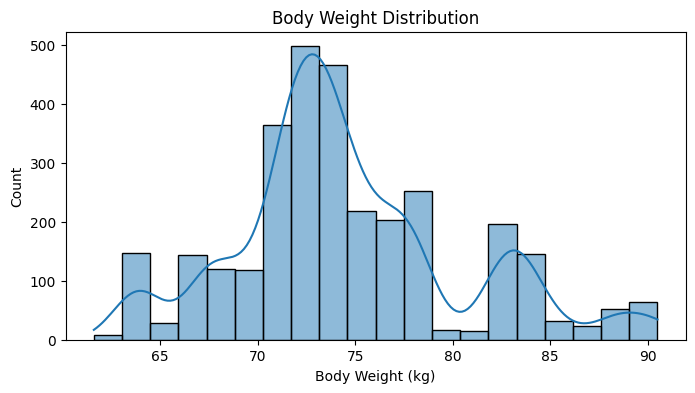

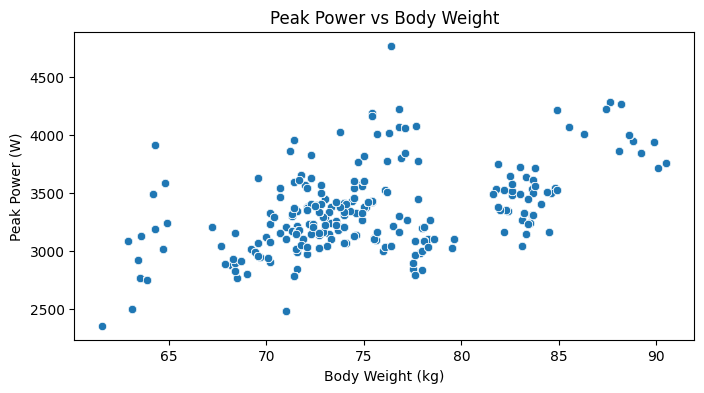

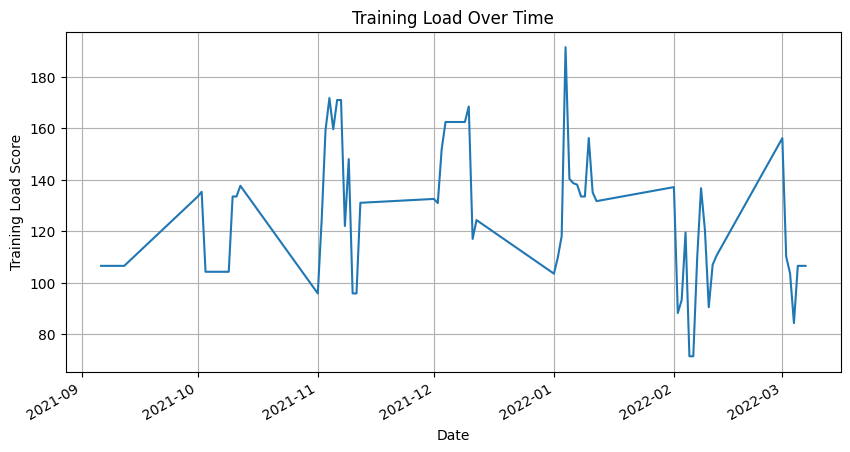

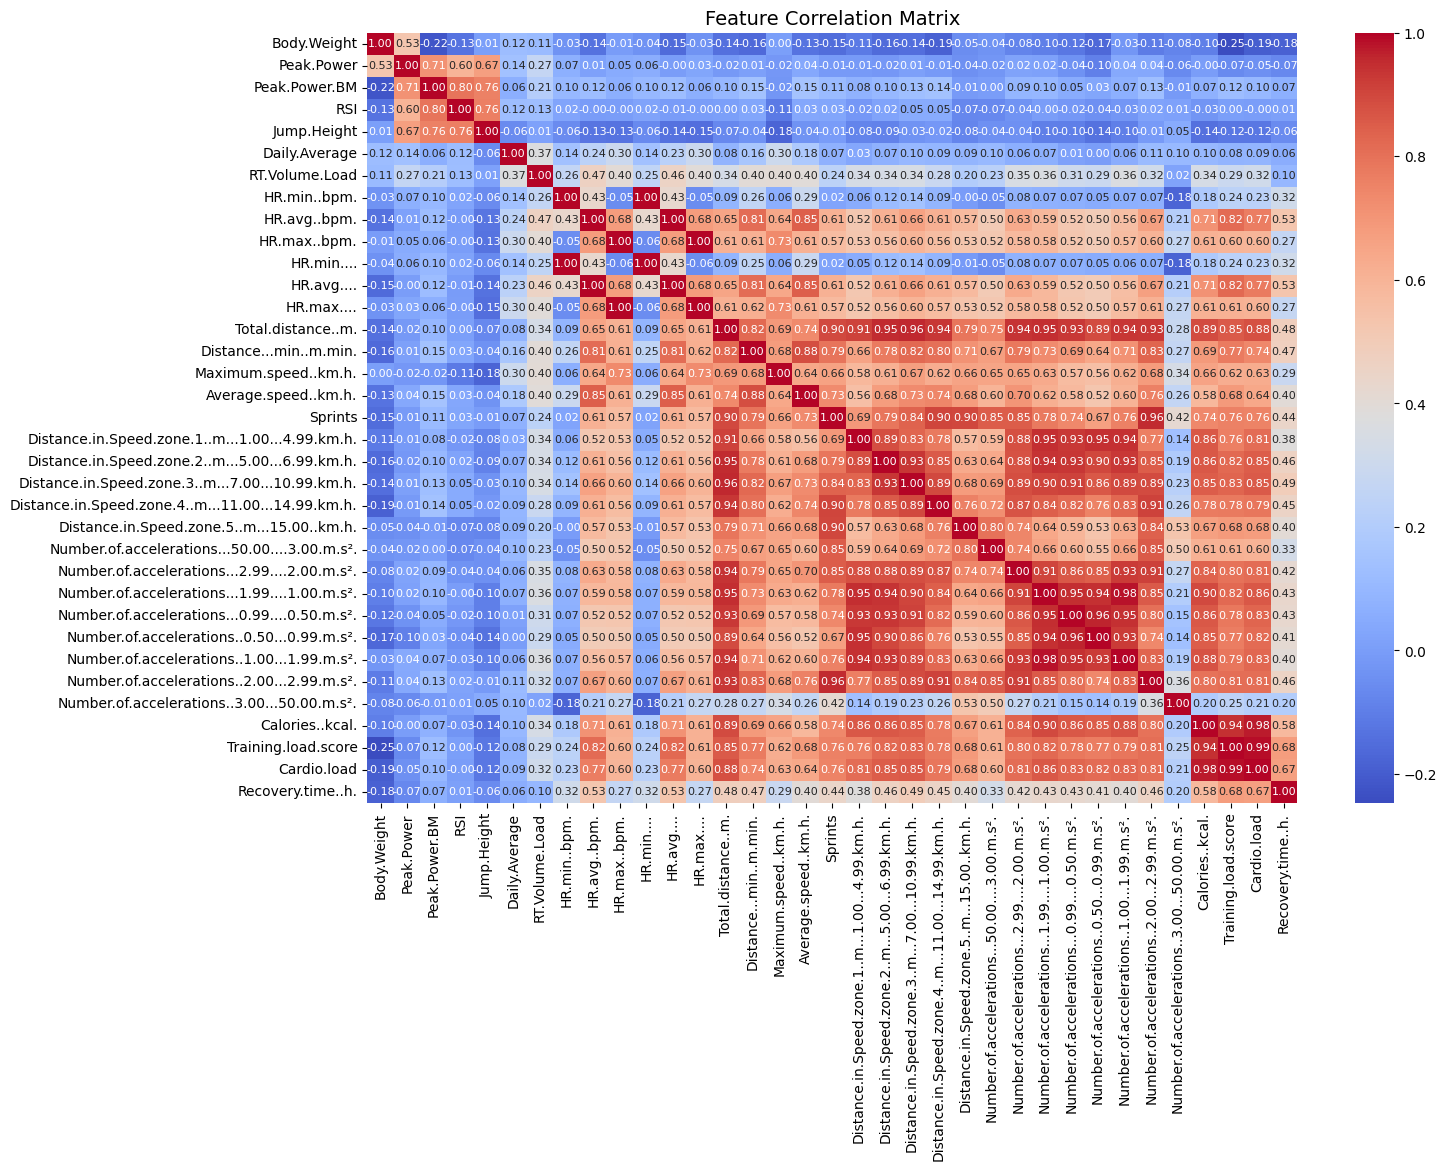

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data (Update file path)
df = pd.read_csv("/content/7.csv")

### 🔹 Step 1: Data Cleaning ###
# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Fill missing values
df.fillna(method="ffill", inplace=True)  # Forward fill missing values
df.dropna(thresh=5, inplace=True)  # Drop rows with <5 non-NaN values

# Identify numeric columns (Exclude non-numeric ones like "Athlete", "Session.name")
numeric_cols = df.select_dtypes(include=["number"]).columns

# Convert only numeric columns to proper format
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

# Check data types
print(df.dtypes)

### 🔹 Step 2: Data Summary ###
print("\n🔹 Missing Values:\n", df.isnull().sum())
print("\n🔹 Data Summary:\n", df.describe())
print("\n🔹 Unique Session Types:\n", df["Session.name"].unique())

### 🔹 Step 3: Data Visualization ###
# 1️⃣ Body Weight Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df["Body.Weight"].dropna(), bins=20, kde=True)
plt.title("Body Weight Distribution")
plt.xlabel("Body Weight (kg)")
plt.show()

# 2️⃣ Peak Power vs Body Weight
plt.figure(figsize=(8, 4))
sns.scatterplot(x=df["Body.Weight"], y=df["Peak.Power"])
plt.title("Peak Power vs Body Weight")
plt.xlabel("Body Weight (kg)")
plt.ylabel("Peak Power (W)")
plt.show()

# 3️⃣ Training Load Over Time
df_grouped = df.groupby("Date")["Training.load.score"].mean()
plt.figure(figsize=(10, 5))
df_grouped.plot()
plt.title("Training Load Over Time")
plt.xlabel("Date")
plt.ylabel("Training Load Score")
plt.grid()
plt.show()

# 4️⃣ Correlation Heatmap
plt.figure(figsize=(15, 10))  # Bigger figure size
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 8})
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.yticks(rotation=0)   # Keep y-axis labels readable
plt.title("Feature Correlation Matrix", fontsize=14)  # Bigger title
plt.show()

